<a href="https://colab.research.google.com/github/IlyasHidayatR/Python_SimpleProgram/blob/main/Regresi_PrediksiHargaCabai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identifikasi dataset

Dataset yang digunakan adalah data harga bahan pokok cabai merah pada setiap tahun di pasaran.

In [ ]:
import pandas as pd

Chili = {'Tahun': [2017, 2018, 2019, 2020, 2021, 2022],
         'Harga Cabai (Rp/Kg)' : [120000, 60000, 50000, 60000, 90000, 70000]}

Chili_df = pd.DataFrame(Chili)
Chili_df

,Tahun,Harga Cabai (Rp/Kg)
0,2017,120000
1,2018,60000
2,2019,50000
3,2020,60000
4,2021,90000
5,2022,70000


# Visualisasi dataset cabai

Dalam hal ini, data akan divisualisasi ke dalam sebuah grafik untuk menentukan target

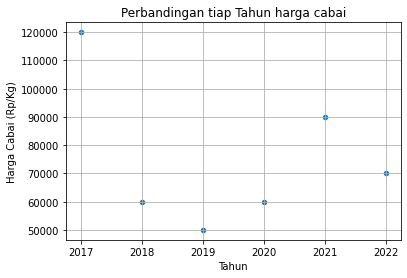

In [ ]:
import matplotlib.pyplot as plt

Chili_df.plot.scatter(x='Tahun', y='Harga Cabai (Rp/Kg)')

plt.title('Perbandingan tiap Tahun harga cabai')
plt.xlabel('Tahun')
plt.ylabel('Harga Cabai (Rp/Kg)')
plt.grid(True)
plt.show()

# Penyesuaian dataset menjadi 2 dimensi

Dalam langkah ini, dataset yang didapat akan disesuaikan dengan model yang akan dibuat

In [ ]:
import numpy as np

x = np.array(Chili_df['Tahun'])
y = np.array(Chili_df['Harga Cabai (Rp/Kg)'])

print(f'x: {x}')
print(f'y: {y}')

x: [2017 2018 2019 2020 2021 2022]
y: [120000  60000  50000  60000  90000  70000]


In [ ]:
x = x.reshape(-1, 1)
x.shape

(6, 1)

In [ ]:
x

array([[2017],
       [2018],
       [2019],
       [2020],
       [2021],
       [2022]])

# Training Simple Linear Regression Model

Dalam tahap ini, akan dibuat sebuah model menggunakan metode linear regresi

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

LinearRegression()

# Visualisasi Simple Linear Regression Model

Dalam tahap ini, akan menampilkan visualisi model yang telah dibuat dengan menggunakana dataset sebelumnya

In [ ]:
x_vis = np.array([2015, 2025]).reshape(-1, 1)
y_vis = model.predict(x_vis)

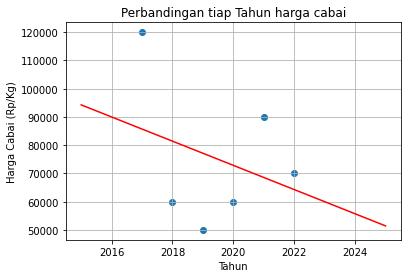

In [ ]:
plt.scatter(x, y)
plt.plot(x_vis, y_vis, '-r')

plt.title('Perbandingan tiap Tahun harga cabai')
plt.xlabel('Tahun')
plt.ylabel('Harga Cabai (Rp/Kg)')
plt.grid(True)
plt.show()

Dalam grafik, selanjutnya adalah mencari nilai intercept dan slope yang akan menjadi acuan perhitungan prediksi harga cabai

In [ ]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: 8730000.000000002
slope: [-4285.71428571]


# Prediksi harga cabai di tahun berikutnya

Pada tahap ini, akan dilakukan uji coba prediksi cabai pada tahun 2021 dan 2022

In [25]:
tahun_chili = np.array([2023, 2024, 2025, 2026]).reshape(-1, 1)
tahun_chili

array([[2023],
       [2024],
       [2025],
       [2026]])

In [26]:
prediksi_harga = model.predict(tahun_chili)
prediksi_harga

array([60000.        , 55714.28571429, 51428.57142857, 47142.85714286])

In [27]:
for chl, hrg in zip(tahun_chili, prediksi_harga):
  print(f'Tahun : {chl} prediksi harga : {hrg}')

Tahun : [2023] prediksi harga : 60000.0
Tahun : [2024] prediksi harga : 55714.28571428731
Tahun : [2025] prediksi harga : 51428.57142857276
Tahun : [2026] prediksi harga : 47142.85714285821


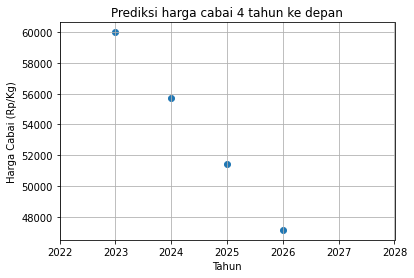

In [31]:
tahun_chili = tahun_chili.flatten()

plt.scatter(tahun_chili, prediksi_harga)

plt.title('Prediksi harga cabai 4 tahun ke depan')
plt.xlabel('Tahun')
plt.ylabel('Harga Cabai (Rp/Kg)')
plt.xlim(2022, 2028)
plt.grid(True)
plt.show()

# Evaluasi Simple Linear Regression Model

**Training & Testing Dataset**

Pada bagian ini akan dilakukan evaluasi terhadap model menggunakan data tes dan data training

In [ ]:
x_train = np.array([2017, 2018, 2019, 2020, 2021, 2022]).reshape(-1, 1)
y_train = np.array([120000, 60000, 50000, 60000, 90000, 70000])

x_test = np.array([2023, 2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
y_test = np.array([100000, 40000, 450000, 700000, 50000, 90000])

**Training Simple Linear Regression Model**

Pada bagian ini akan dibuat sebuah model baru menggunakan Linear Regression

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

**Evaluasi Linear Regression dengan Coefficient of Determination atau R-squered**

Pada bagian ini akan dilakukannya proses evaluasi model

In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(x_test)

r_squared = r2_score(y_test, y_pred)

print(f'R-squered: {r_squared}')

R-squered: -0.5770280117574536


Pada hasil diatas dapat dikatakan bahwa model yang dibuat buruk karena hasil perhitungan evaluasi model menggunakan R-squered adalah negatif